In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import zipfile

import plotly.express as px

from jupyterthemes import jtplot

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [2]:
gaikindo_df = pd.read_csv('data/Gaikindo_Import.csv', delimiter = ';')

In [3]:
gaikindo_df.tail(100)

,NO,JENIS,IMPORTER,BRAND,MODEL,CC,TRANS,FUEL,TANK,GVW,...,DOOR,WHEELS,CBU/CKD/COMP,ORIGIN COUNTRY,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE
270,271,CBU IMPORT,PT. NISSAN MOTOR INDONESIA,NISSAN,Leaf,0,AT,BEV,0,-,...,-,-,CBU,Japan,-,-,-,-,-,-
271,272,CBU IMPORT,PT. NISSAN MOTOR INDONESIA,NISSAN,Leaf,0,AT,BEV,0,-,...,-,-,CBU,Japan,-,-,-,-,-,-
272,273,CBU IMPORT,PT. NISSAN MOTOR INDONESIA,NISSAN,Magnite Premium Turbo CVT,999,AT,G,0,-,...,5,4,CBU,Thailand,12,19,39,53,31,1
273,274,CBU IMPORT,PT. NETA AUTO INDONESIA,NETA,NETA V EV,0,AT,BEV,0,1151,...,5,4,CBU,China,-,-,-,-,-,-
274,275,CBU IMPORT,PT INDOMOBIL WAHANA TRADA,CITROEN,New E0C3 All Electric,1200,MT,BEV,30,1316,...,5,4,CBU,India,36,45,32,26,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,368,COMPONENT PARTS IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,PARTS,-,-,G,-,-,...,5,-,Component,India,7443,9990,9900,23653,17411,46643
366,369,COMPONENT PARTS IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,PARTS,-,-,G,-,-,...,5,-,Component,Japan,1582053,232897,1003917,2031792,149550,812288
367,370,COMPONENT PARTS IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,PARTS,-,-,G,-,-,...,5,-,Component,Thailand,23132,8378,14541,46614,16611,18614
368,371,COMPONENT PARTS IMPORT,PT. SOKONINDO AUTOMOBILE,DFSK,Supercab 1.3L D T 4X2 MT,1248,MT,D,55,2655,...,2,4,Component,-,-,-,NaN,NaN,NaN,NaN


In [4]:
gaikindo_df.describe()

,NO
count,370.000000
mean,185.837838
std,107.438900
min,1.000000
25%,93.250000
50%,185.500000
75%,277.750000
max,372.000000


In [5]:
gaikindo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NO                 370 non-null    int64 
 1   JENIS              370 non-null    object
 2   IMPORTER           370 non-null    object
 3   BRAND              370 non-null    object
 4   MODEL              370 non-null    object
 5   CC                 370 non-null    object
 6   TRANS              370 non-null    object
 7   FUEL               370 non-null    object
 8   TANK               370 non-null    object
 9   GVW                370 non-null    object
 10  GEAR RATIO         359 non-null    object
 11  WHEEL & TYRE SIZE  370 non-null    object
 12  PS/HP              370 non-null    object
 13  WHEEL BASE         370 non-null    object
 14  DIMENSION          370 non-null    object
 15  SEATER             370 non-null    object
 16  DRIVE SYS          370 non-null    object
 1

In [6]:
gaikindo_df.drop(columns=['GVW', 'TANK', 'CC', 'TRANS', 'TANK', 'GVW', 'GEAR RATIO', 'WHEEL & TYRE SIZE', 'PS/HP', 'WHEEL BASE', 'DIMENSION', 'SEATER', 'DRIVE SYS', 'DRIVE SYS2', 'SPEED', 'DOOR', 'WHEELS', 'CBU/CKD/COMP'], inplace=True)

In [7]:
gaikindo_df.head()

,NO,JENIS,IMPORTER,BRAND,MODEL,FUEL,ORIGIN COUNTRY,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE
0,1,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,ALL NEW CITY,G,Thailand,-,-,-,-,-,-
1,2,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,ALL NEW CIVIC,G,Thailand,-,-,-,-,-,-
2,3,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,NEW CIVIC,HYBRID,Thailand,-,-,-,-,30,60
3,4,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,CIVIC TYPE R,G,UK,-,-,1,-,-,-
4,5,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,New ACCORD VTi-L,G,Thailand,-,-,-,-,-,-


In [8]:
gaikindo_df['FUEL'].unique()

array(['G', 'HYBRID', 'BEV', 'D', 'HEV', 'PHEV', '-'], dtype=object)

In [9]:
gaikindo_df['ORIGIN COUNTRY'].unique()

array(['Thailand', 'UK', 'China', '-', 'Japan', 'India', 'Malaysia',
       'INA', 'Germany', 'USA', 'South Korea', 'Korea', 'Brazil',
       'Spanyol', 'Indonesia', nan, 'Philippine', 'America'], dtype=object)

In [10]:
gaikindo_df[gaikindo_df['ORIGIN COUNTRY'] == 'Korea']['BRAND'].value_counts()

BRAND
KIA    6
Name: count, dtype: int64

In [11]:
gaikindo_df['IMPORTER'].unique()

array(['PT. HONDA PROSPECT MOTOR', 'PT. TOYOTA ASTRA MOTOR',
       'PT. SUZUKI INDOMOBIL MOTOR',
       'PT. MITSUBISHI MOTORS KRAMA YUDHA INDONESIA',
       'PT. ASTRA DAIHATSU MOTOR', 'PT. TJAHJA SAKTI MOTOR',
       'PT. GAYA MAKMUR MOBIL', 'PT. ISUZU ASTRA MOTOR INDONESIA',
       'PT. EUROKARS MOTOR INDONESIA', 'PT. GARUDA MATARAM MOTOR',
       'PT. HYUNDAI MOTORS INDONESIA (HMID)',
       'PT. ASTRA INTERNATIONAL UD TRUCKS SALES OPERATION',
       'PT. HINO MOTORS SALES INDONESIA', 'PT. KERETA INDO ARTA',
       'PT DAIMLER COMMERCIAL VEHICLES INDONESIA',
       'PT MERSEDES-BENZ INDONESIA', 'PT. SAIC MOTOR INDONESIA',
       'PT. SOKONINDO AUTOMOBILE', 'PT. NISSAN MOTOR INDONESIA',
       'PT. NETA AUTO INDONESIA', 'PT INDOMOBIL WAHANA TRADA',
       'PT. PLAZA AUTO MEGA', 'PT INCHAPE INDOMOBIL ENERGI BARU',
       'PT LEADING VISION OTOMOTIF', 'PT BYD MOTOR INDONESIA',
       'PT. DAS Motor Indonesia', 'PT MITRA BISNIS (MRA)',
       'PT. AION INDOMOBIL DISTRIBUTION INDONESIA

In [12]:
gaikindo_df['BRAND'].unique()

array(['HONDA', 'TOYOTA', 'LEXUS', 'SUZUKI', 'MITSUBISHI MOTORS',
       'DAIHATSU', 'BMW', 'MINI', 'FAW', 'ISUZU', 'MAZDA', 'VOLKSWAGEN',
       'AUDI', 'HYUNDAI - HMID', 'UD TRUCK', 'HINO', 'KIA',
       'MERSEDES-BENZ CV', 'MERSEDES-BENZ PC', 'MORRIS GARAGE', 'DFSK',
       'NISSAN', 'NETA', 'CITROEN', 'SUBARU', 'GWM', 'VOLVO', 'BYD',
       'DENZA', 'BAIC', 'FORD', 'AION', 'XPENG', 'GEELY'], dtype=object)

In [13]:
gaikindo_df['MODEL'].unique()

array(['ALL NEW CITY', 'ALL NEW CIVIC', 'NEW CIVIC', 'CIVIC TYPE R',
       'New ACCORD VTi-L', 'New ACCORD HEV', 'E:N1', 'All New CR-V 1.5 T',
       'All New CR-V 2.0 e:HEV', 'Vios 1.5 G Cvt Fmc',
       'All New Corolla Altis 1.8 V AT 2023',
       'All New Corolla Altis 1.8 Hev Cvt 2023', 'Prius 1.8 Hev 2023',
       'All New Camry 2.5 V 2021', 'All New Camry 2.5 Hev 2021',
       'GR 86 AT', 'GR Supra 3.0 AT', 'Voxy 2.0 Cvt', 'Alphard 2.5 G Cvt',
       'Alphard 2.5 Hev Cvt', 'Vellfire 2.5 G Cvt',
       'Vellfire 2.5 Vip Hev Cvt', 'Corolla Cross 1.8 AT Hev',
       'Corolla Cross 1.8 AT Hev Gr Sport', 'Land Cruiser 300 Gr-S',
       'Land Cruiser 300 Vx-R', 'Bz4X Ev', 'Gr Yaris 1.6',
       'Gr Yaris 1.6 AT', 'Hi-Ace Commuter Hi Grade', 'Hi-Ace 2.8 Premio',
       'Hilux 2.0 PU Scab', 'Hilux 2.4 PU Scab', 'Hilux 2.4 PU Scab 4X4',
       'Hilux 2.4 PU Dcab E 4X4', 'Hilux 2.4 PU Dcab G 4X4',
       'Hilux 2.4 PU Dcab V 4X4', 'Hi-Lux Rangga Mb Cab-Chassis 2.0 Std',
       'Hi-Lux Ra

In [14]:
gaikindo_df.isnull().sum()

NO                0
JENIS             0
IMPORTER          0
BRAND             0
MODEL             0
FUEL              0
ORIGIN COUNTRY    2
JANUARY           2
FEBRUARY          2
MARCH             4
APRIL             4
MAY               4
JUNE              7
dtype: int64

In [15]:
kolom_numerik = ['JANUARY', 'FEBRUARY', 'MARCH', 
                 'APRIL', 'MAY', 'JUNE']

for kolom in kolom_numerik:
    gaikindo_df[kolom] = pd.to_numeric(gaikindo_df[kolom], errors='coerce')

print(gaikindo_df[kolom_numerik].dtypes)


JANUARY     float64
FEBRUARY    float64
MARCH       float64
APRIL       float64
MAY         float64
JUNE        float64
dtype: object


In [16]:
month_cols = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE']
gaikindo_df[month_cols] = gaikindo_df[month_cols].fillna(0).astype(float)

In [17]:
gaikindo_df.describe().round(1)

,NO,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE
count,370.0,370.0,370.0,370.0,370.0,370.0,370.0
mean,185.8,25130.6,22809.3,21086.5,26992.0,13952.6,25177.1
std,107.4,200625.7,257077.9,200086.4,203379.3,162098.6,200677.8
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,93.2,0.0,0.0,0.0,0.0,0.0,0.0
50%,185.5,0.0,0.0,0.0,0.0,0.0,0.0
75%,277.8,6.8,9.0,8.0,8.0,14.5,10.0
max,372.0,2489790.0,4601850.0,3026430.0,2343630.0,2731710.0,2833470.0


In [18]:
gaikindo_df = gaikindo_df.replace('-', np.nan)
gaikindo_df

,NO,JENIS,IMPORTER,BRAND,MODEL,FUEL,ORIGIN COUNTRY,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE
0,1,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,ALL NEW CITY,G,Thailand,0.0,0.0,0.0,0.0,0.0,0.0
1,2,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,ALL NEW CIVIC,G,Thailand,0.0,0.0,0.0,0.0,0.0,0.0
2,3,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,NEW CIVIC,HYBRID,Thailand,0.0,0.0,0.0,0.0,30.0,60.0
3,4,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,CIVIC TYPE R,G,UK,0.0,0.0,1.0,0.0,0.0,0.0
4,5,CBU IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,New ACCORD VTi-L,G,Thailand,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,368,COMPONENT PARTS IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,PARTS,G,India,7443.0,9990.0,9900.0,23653.0,17411.0,46643.0
366,369,COMPONENT PARTS IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,PARTS,G,Japan,1582053.0,232897.0,1003917.0,2031792.0,149550.0,812288.0
367,370,COMPONENT PARTS IMPORT,PT. HONDA PROSPECT MOTOR,HONDA,PARTS,G,Thailand,23132.0,8378.0,14541.0,46614.0,16611.0,18614.0
368,371,COMPONENT PARTS IMPORT,PT. SOKONINDO AUTOMOBILE,DFSK,Supercab 1.3L D T 4X2 MT,D,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
gaikindo_df['ORIGIN COUNTRY'] = gaikindo_df['ORIGIN COUNTRY'].fillna('UNKNOWN')

In [20]:
gaikindo_df['FUEL'] = gaikindo_df['FUEL'].fillna('UNKNOWN')

In [21]:
gaikindo_df['ORIGIN COUNTRY'] = gaikindo_df['ORIGIN COUNTRY'].replace('INA', 'Indonesia')

In [22]:
gaikindo_df['ORIGIN COUNTRY'] = gaikindo_df['ORIGIN COUNTRY'].replace('Korea', 'South Korea')

In [23]:
gaikindo_df[gaikindo_df['ORIGIN COUNTRY'].isin(['Korea', 'South Korea'])].tail(100)

,NO,JENIS,IMPORTER,BRAND,MODEL,FUEL,ORIGIN COUNTRY,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE
184,185,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Kona EV,BEV,South Korea,0.0,0.0,0.0,0.0,0.0,0.0
185,186,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Ioniq EV Prime,BEV,South Korea,0.0,0.0,0.0,0.0,0.0,0.0
186,187,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Genesis G80 EV,BEV,South Korea,0.0,0.0,1.0,0.0,2.0,0.0
187,188,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Genesis G80,G,South Korea,0.0,0.0,0.0,0.0,0.0,0.0
188,189,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Tucson,G,South Korea,0.0,10.0,0.0,0.0,0.0,0.0
189,190,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Tucson HEV,HYBRID,South Korea,0.0,60.0,71.0,0.0,0.0,0.0
190,191,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Ioniq5,BEV,South Korea,0.0,0.0,0.0,0.0,0.0,0.0
191,192,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Palisade 2.2 CRDi Prime,D,South Korea,10.0,0.0,0.0,4.0,8.0,0.0
192,193,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Palisade 2.2 CRDi Signature,D,South Korea,228.0,96.0,64.0,145.0,55.0,0.0
193,194,CBU IMPORT,PT. HYUNDAI MOTORS INDONESIA (HMID),HYUNDAI - HMID,Palisade 2.2 CRDi AWD,D,South Korea,36.0,0.0,6.0,6.0,12.0,0.0


In [24]:
#base on pengetahuan
gaikindo_df['ORIGIN COUNTRY'] = gaikindo_df['ORIGIN COUNTRY'].replace('America', 'USA')

In [25]:
gaikindo_df['ORIGIN COUNTRY'].unique()

array(['Thailand', 'UK', 'China', 'UNKNOWN', 'Japan', 'India', 'Malaysia',
       'Indonesia', 'Germany', 'USA', 'South Korea', 'Brazil', 'Spanyol',
       'Philippine'], dtype=object)

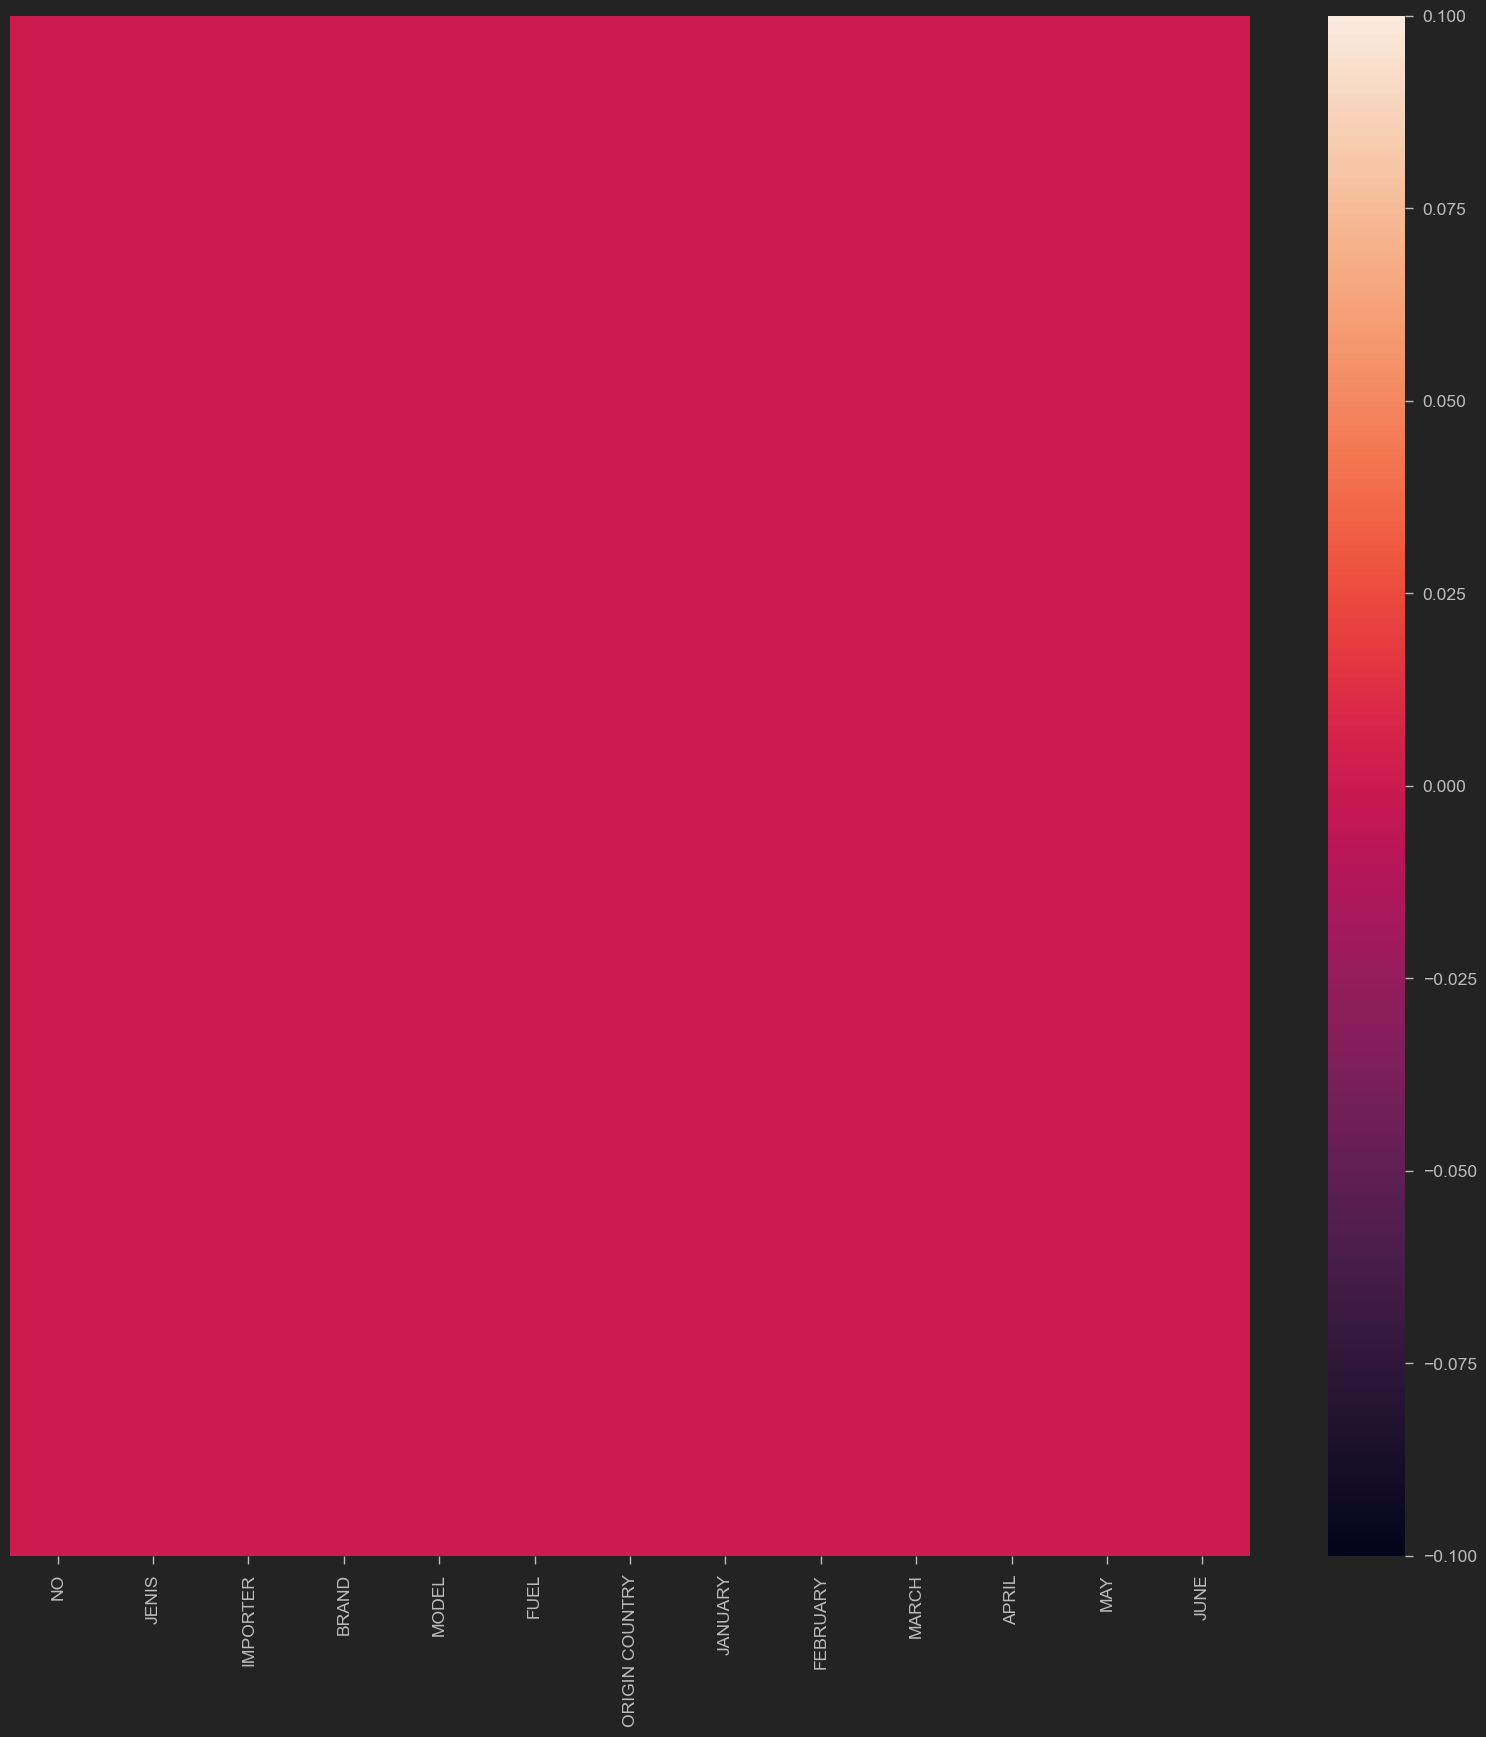

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(gaikindo_df.isnull(), yticklabels = False)
plt.show()

In [27]:
corr_matrix = gaikindo_df.corr(numeric_only=True)

corr_matrix

,NO,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE
NO,1.000000,0.198666,0.138330,0.165290,0.212704,0.136546,0.198924
JANUARY,0.198666,1.000000,0.595733,0.778436,0.849118,0.183486,0.656524
FEBRUARY,0.138330,0.595733,1.000000,0.938638,0.694346,0.431162,0.789464
MARCH,0.165290,0.778436,0.938638,1.000000,0.787194,0.376753,0.786942
APRIL,0.212704,0.849118,0.694346,0.787194,1.000000,0.559180,0.895625
MAY,0.136546,0.183486,0.431162,0.376753,0.559180,1.000000,0.810595
JUNE,0.198924,0.656524,0.789464,0.786942,0.895625,0.810595,1.000000


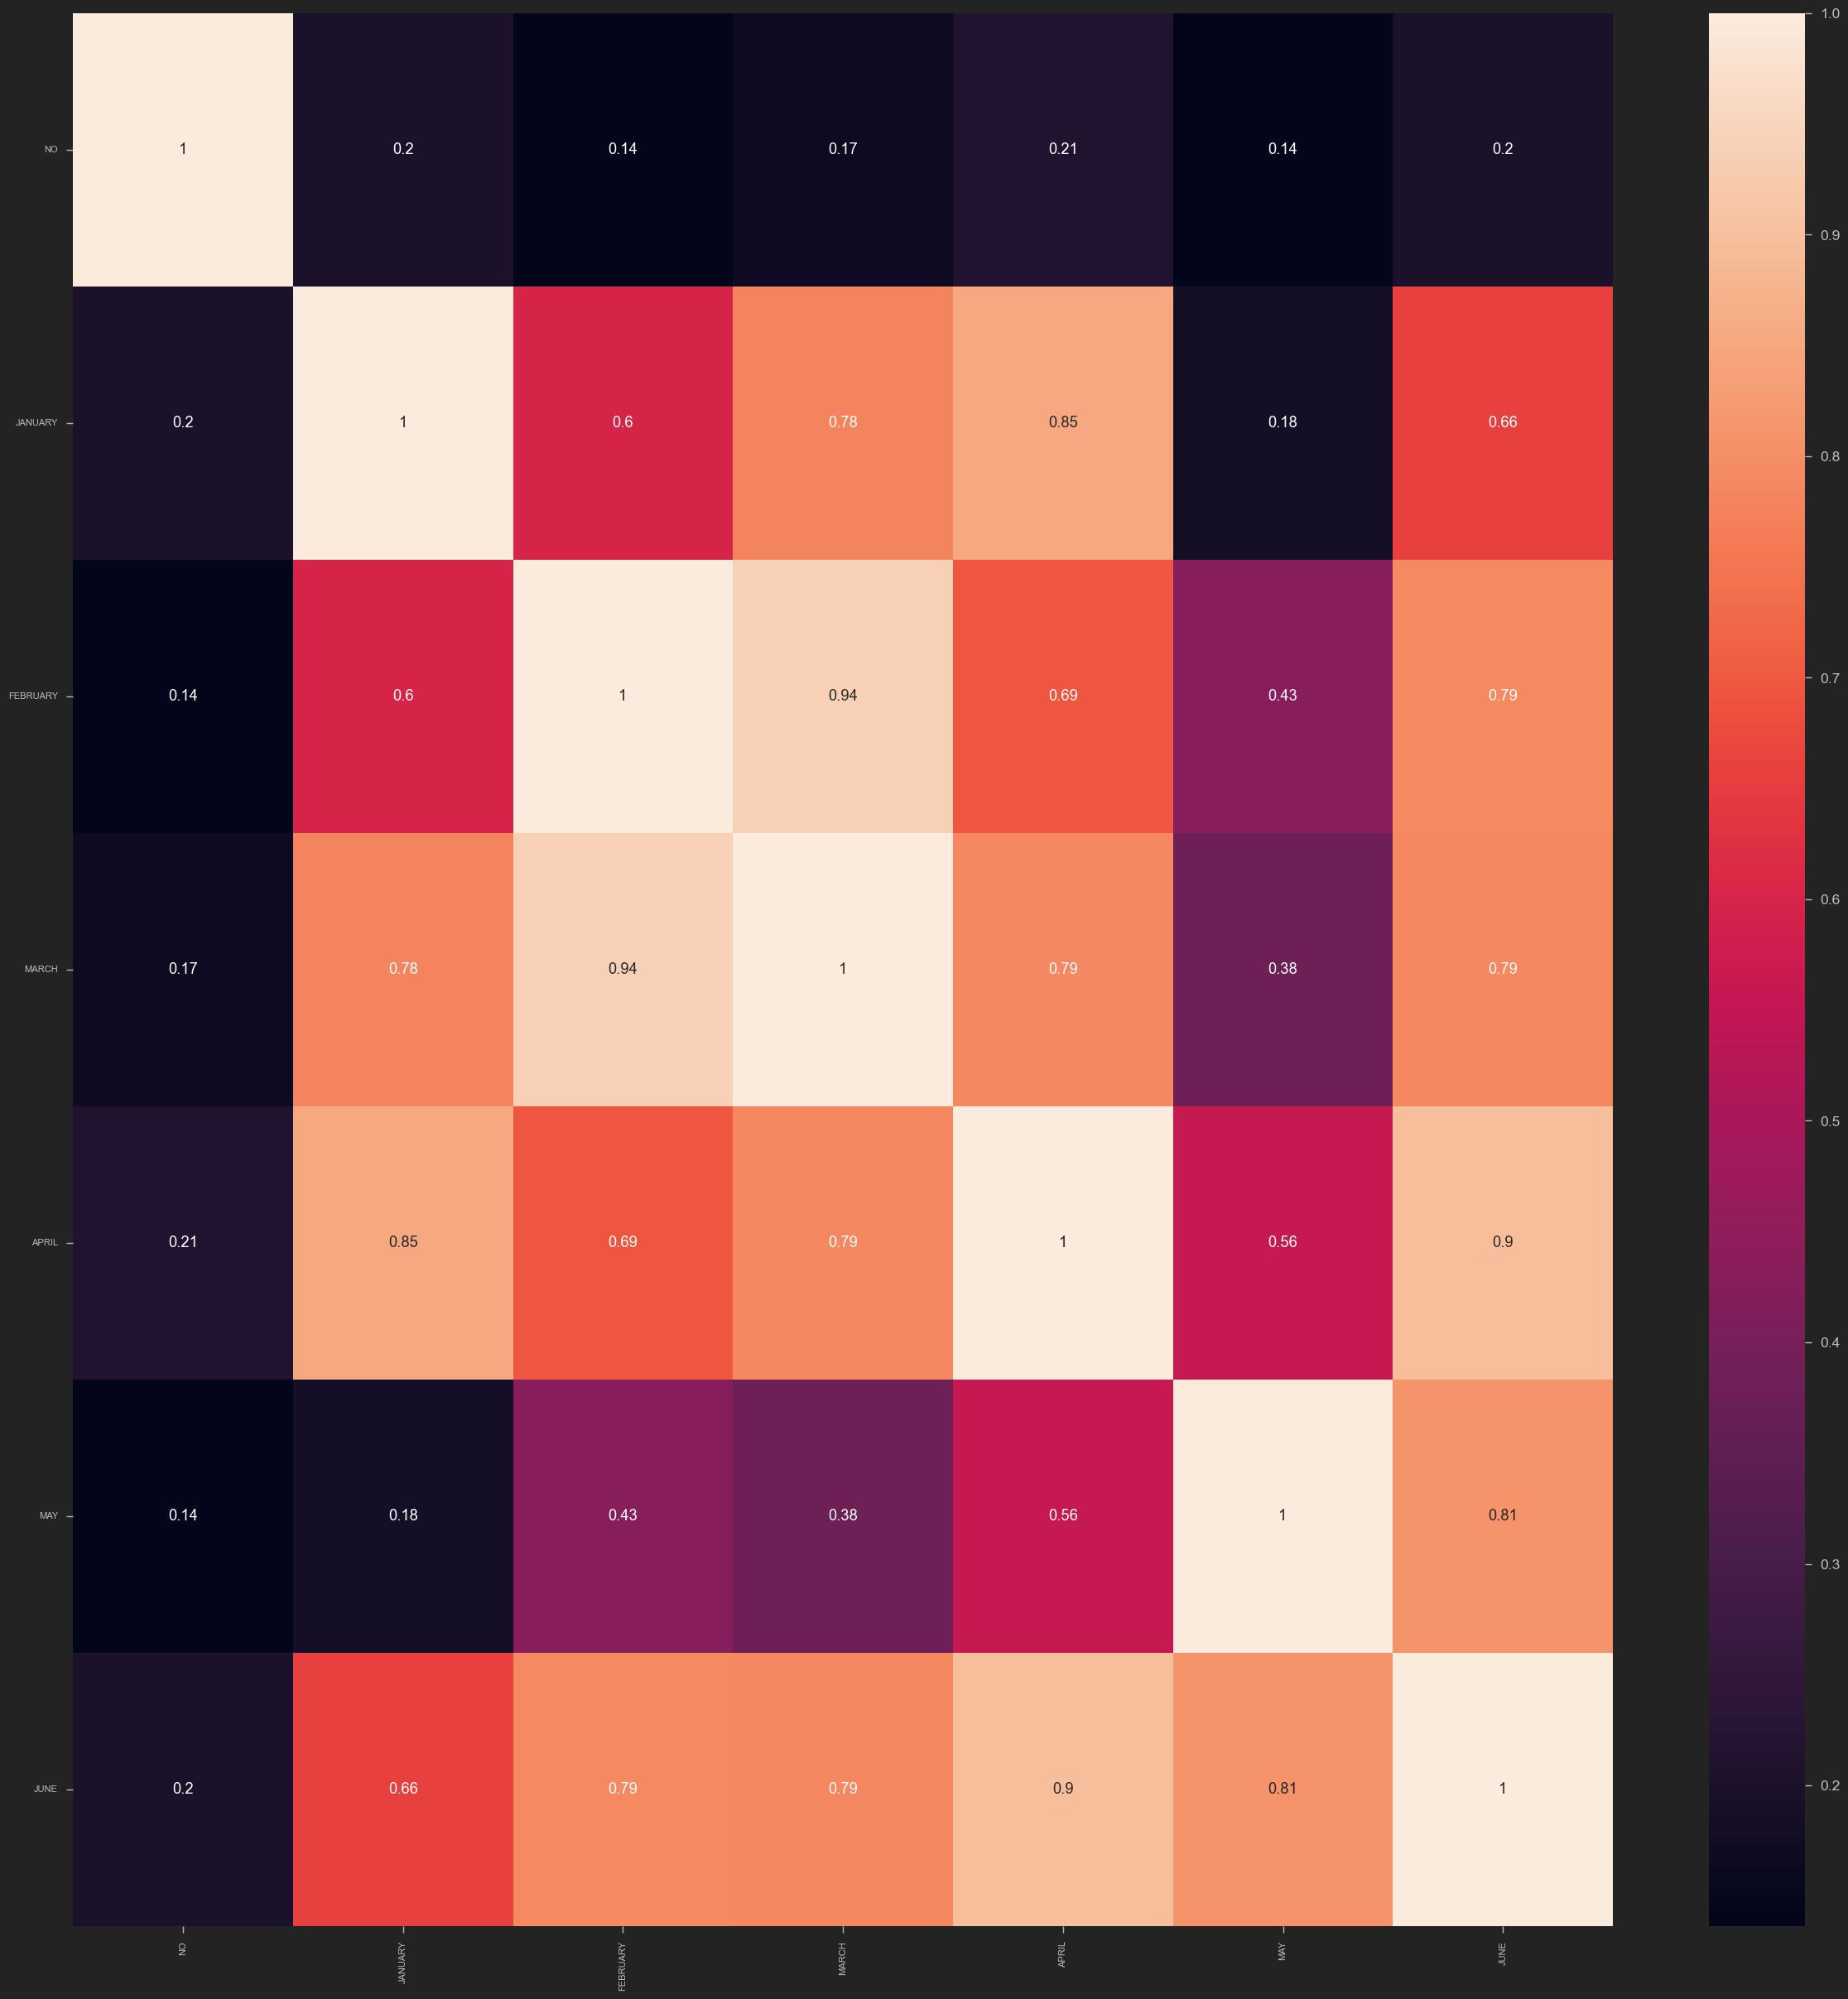

In [28]:

plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

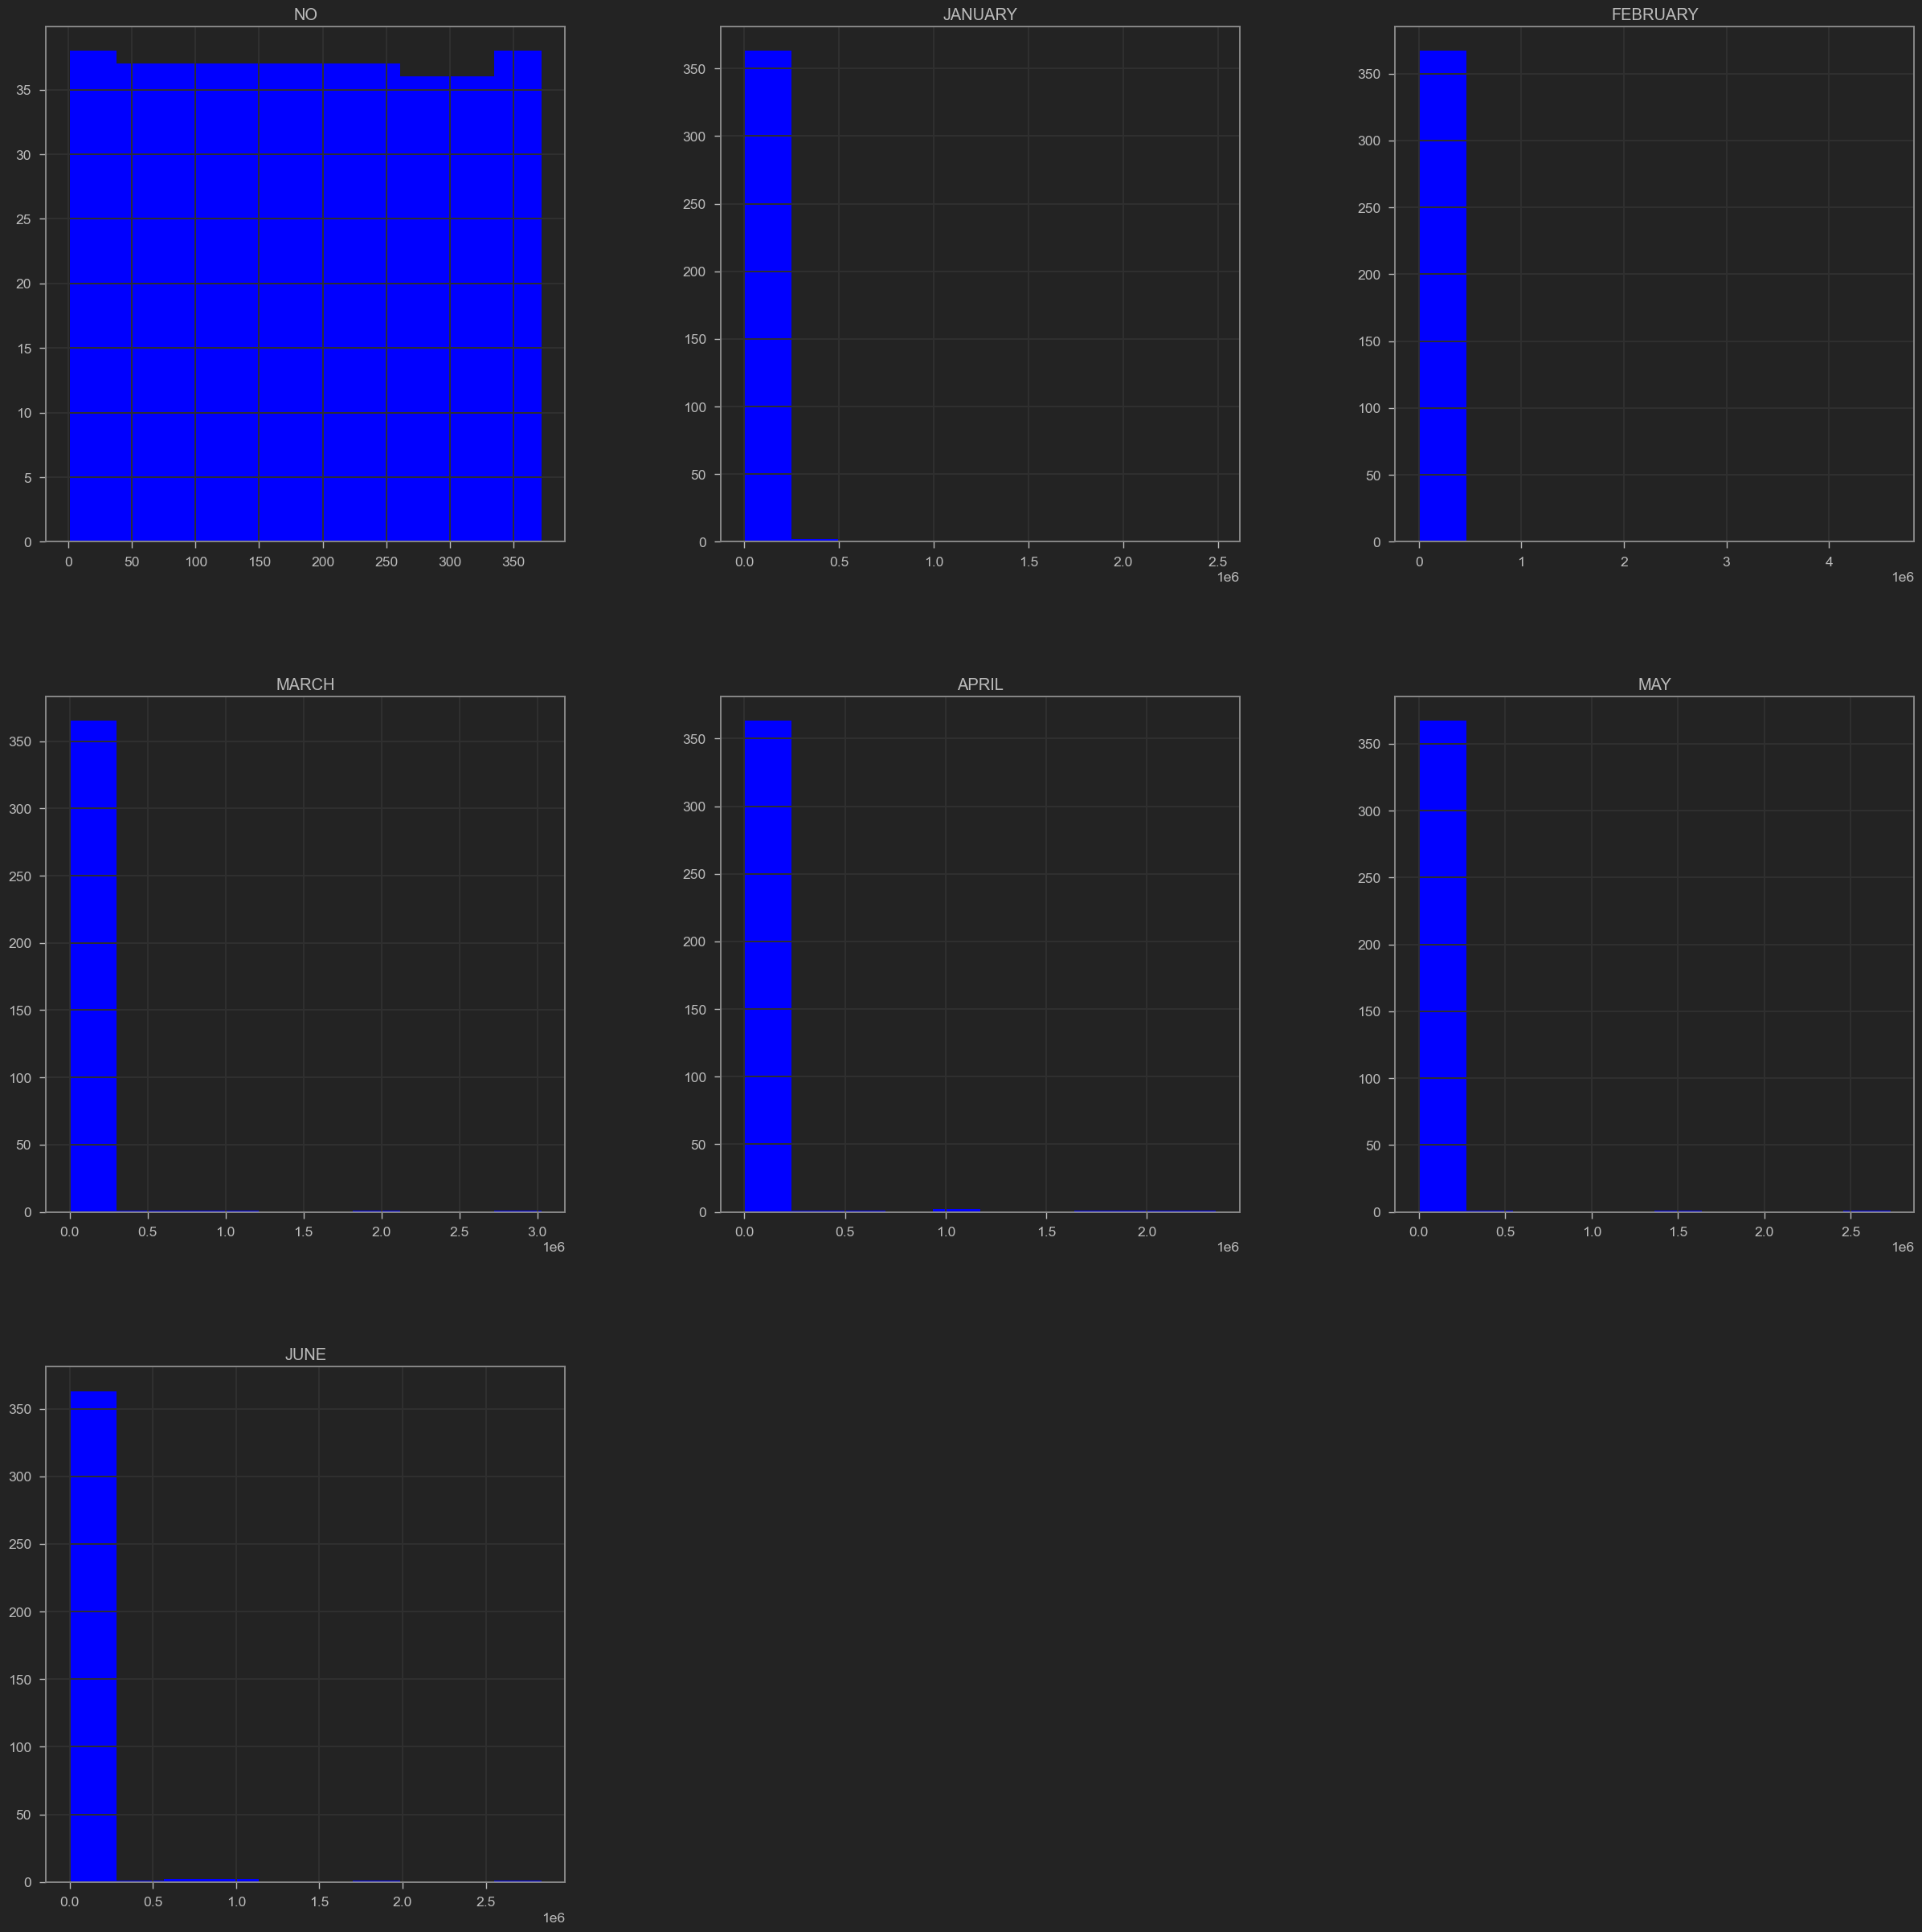

In [29]:
gaikindo_df.hist(bins = 10, figsize = (30,30), color='blue')
plt.show()

In [30]:
gaikindo_df['TOTAL_IMPORT'] = gaikindo_df[month_cols].sum(axis=1)

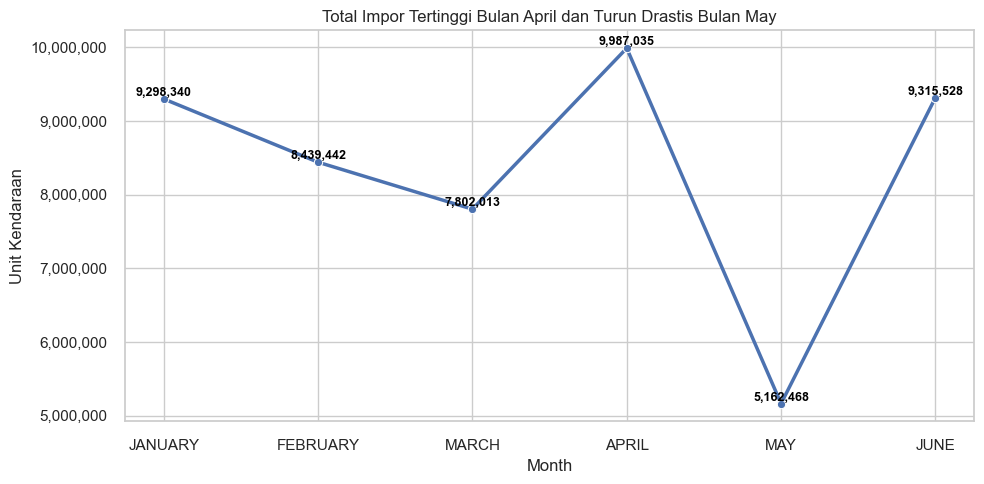

In [31]:
# Hitung ulang total dan pertumbuhan
monthly_total = gaikindo_df[month_cols].sum()
monthly_df = monthly_total.reset_index()
monthly_df.columns = ['Month', 'Total_Import']
monthly_df['MoM_Growth (%)'] = monthly_df['Total_Import'].pct_change() * 100

# Set tema background putih
sns.set_theme(style="whitegrid")

# Plot line chart
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=monthly_df, x='Month', y='Total_Import', marker='o', linewidth=2.5)

# Judul dan label
plt.title('Total Impor Tertinggi Bulan April dan Turun Drastis Bulan May')
plt.ylabel('Unit Kendaraan')

# Format angka di Y-axis agar tidak pakai 1e7
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tambahkan label angka di titik chart (warna putih)
for i, row in monthly_df.iterrows():
    plt.text(i, row['Total_Import'], f"{int(row['Total_Import']):,}", 
             color='black', fontsize=9, fontweight='bold',
             ha='center', va='bottom')

# Tampilkan grid dan rapikan layout
plt.grid(True)
plt.tight_layout()
plt.show()


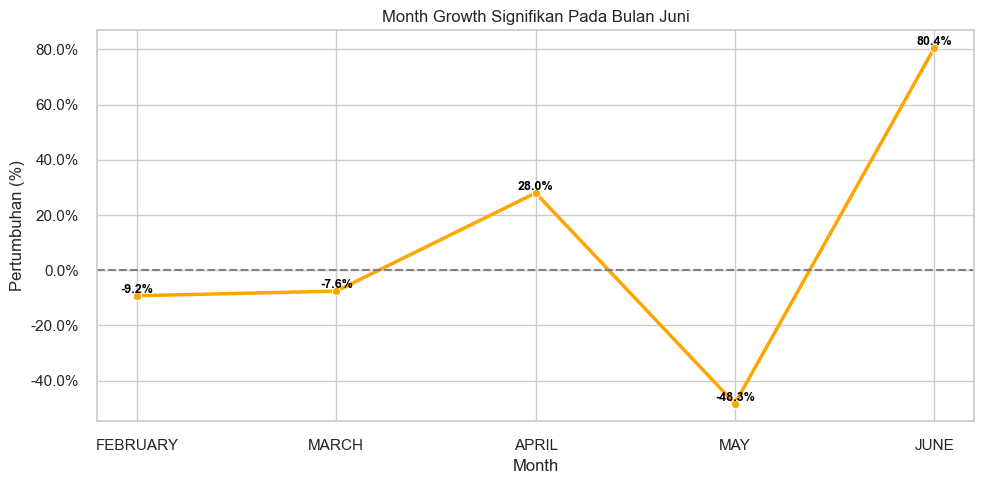

In [33]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=monthly_df, x='Month', y='MoM_Growth (%)',
                  marker='o', linewidth=2.5, color='orange')

plt.axhline(0, color='gray', linestyle='--')

# Judul dan label
plt.title('Month Growth Signifikan Pada Bulan Juni')
plt.ylabel('Pertumbuhan (%)')

# Format Y agar tampil angka biasa
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Tambahkan label angka (warna putih)
for i, row in monthly_df.iterrows():
    plt.text(i, row['MoM_Growth (%)'], f"{row['MoM_Growth (%)']:.1f}%",
             color='black', fontsize=9, fontweight='bold',
             ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
brand_total = gaikindo_df.groupby('BRAND')[month_cols].sum().sum(axis=1).sort_values(ascending=False)

In [35]:
top15_brand_total = brand_total.sort_values(ascending=False).head(15)

C:\Users\USER\AppData\Local\Temp\ipykernel_8312\3537291595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15_brand_total.values, y=top15_brand_total.index, palette='viridis')


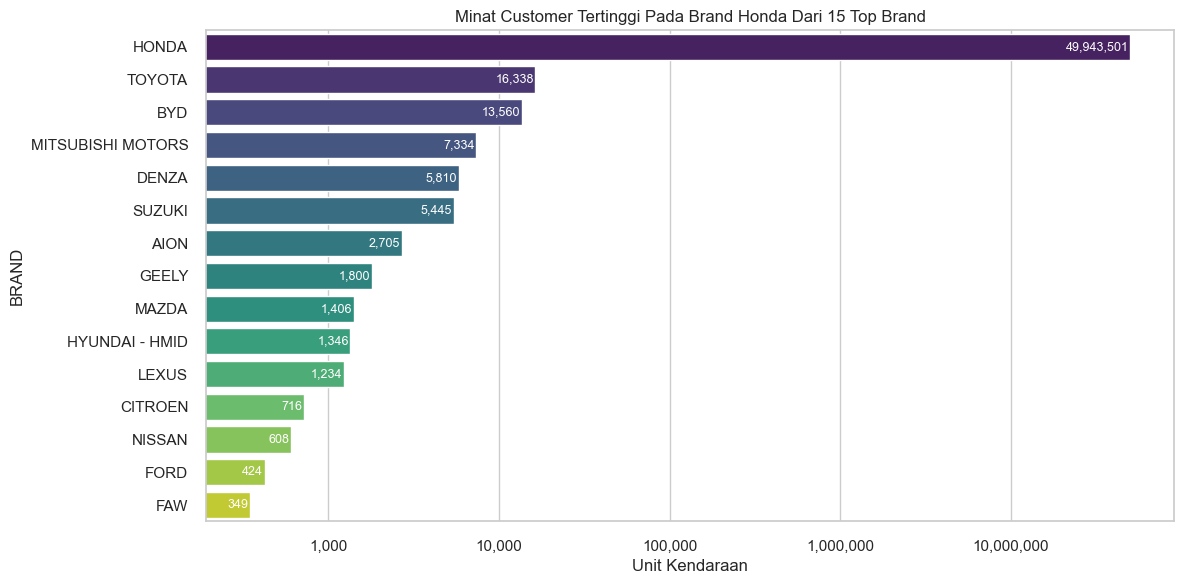

In [38]:

plt.figure(figsize=(12, 6))
sns.barplot(x=top15_brand_total.values, y=top15_brand_total.index, palette='viridis')
plt.title('Minat Customer Tertinggi Pada Brand Honda Dari 15 Top Brand')
plt.xlabel('Unit Kendaraan')
plt.xscale('log')  # agar persebaran data terlihat
# Format angka agar tidak notasi ilmiah
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tambahkan angka di bar (kanan)
for i, (val, label) in enumerate(zip(top15_brand_total.values, top15_brand_total.index)):
    plt.text(val * 0.98, i, f'{int(val):,}', va='center', ha='right', color='white', fontsize=9)
plt.tight_layout()
plt.show()


In [39]:
#country_total = df.groupby('ORIGIN COUNTRY')[month_cols].sum().sum(axis=1).sort_values(ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_8312\3752455251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_total_nonzero.values,


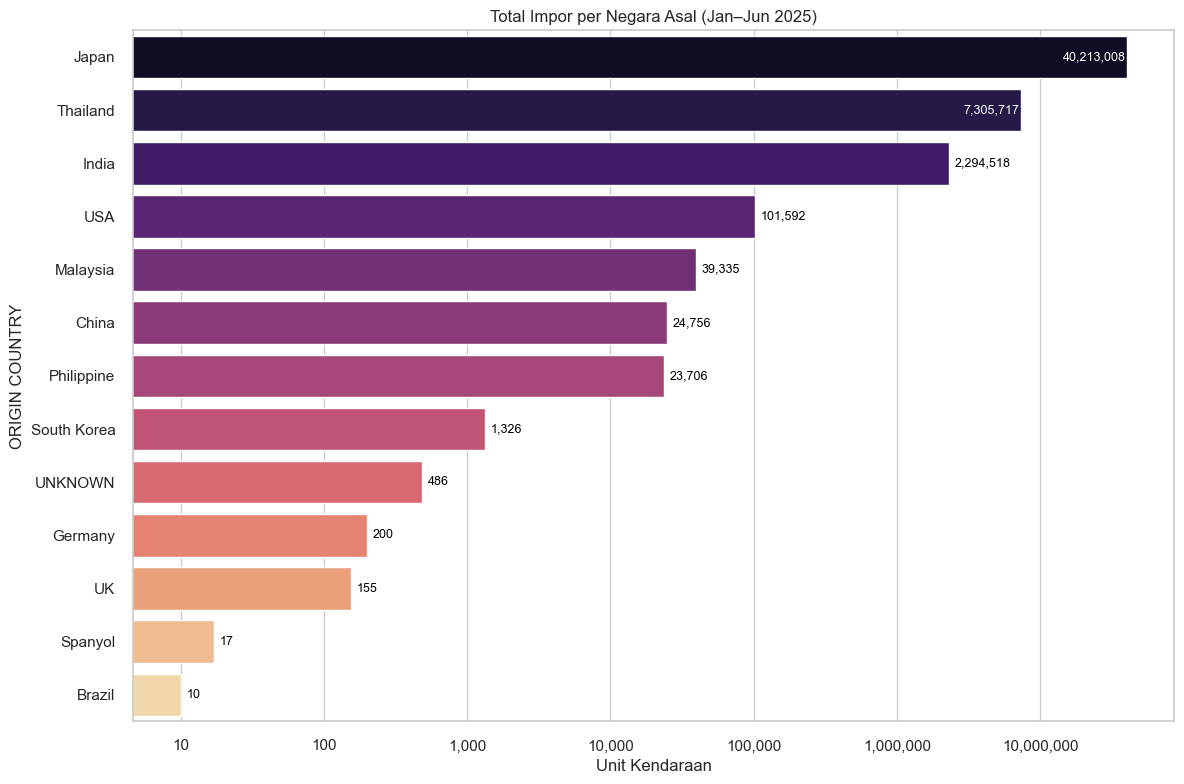

In [51]:
country_total_nonzero = country_total[country_total > 0]

plt.figure(figsize=(12, 8))
sns.barplot(x=country_total_nonzero.values, 
            y=country_total_nonzero.index, 
            palette='magma')

# Pakai skala log agar semua bar terlihat
plt.xscale('log')

# Format angka agar tidak dalam notasi ilmiah
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tambahkan label angka
max_val = max(country_total_nonzero.values)

for i, (val, label) in enumerate(zip(country_total_nonzero.values, country_total_nonzero.index)):
    if val > 0.15 * max_val:
        # label putih di dalam bar
        plt.text(val * 0.98, i, f'{int(val):,}', color='white', va='center', ha='right', fontsize=9)
    else:
        # label hitam di luar bar
        plt.text(val * 1.1, i, f'{int(val):,}', color='black', va='center', ha='left', fontsize=9)

plt.title('Total Impor per Negara Asal (Jan–Jun 2025)')
plt.xlabel('Unit Kendaraan')
plt.ylabel('ORIGIN COUNTRY')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8312\3154821388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=fuel_total.index, y=fuel_total.values, palette='Set2')


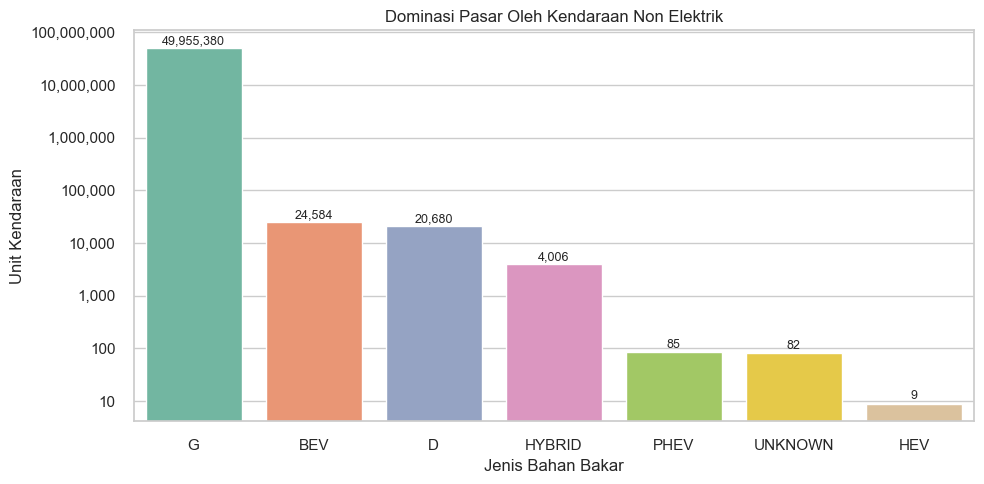

In [52]:
fuel_total = gaikindo_df.groupby('FUEL')[month_cols].sum().sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bars = sns.barplot(x=fuel_total.index, y=fuel_total.values, palette='Set2')
plt.yscale('log')

# Format agar tidak dalam notasi ilmiah
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))

# Tambahkan label angka di atas bar
for i, val in enumerate(fuel_total.values):
    if val > 0:
        plt.text(i, val * 1.05, f'{int(val):,}', ha='center', va='bottom', fontsize=9)

plt.title('Dominasi Pasar Oleh Kendaraan Non Elektrik')
plt.ylabel('Unit Kendaraan')
plt.xlabel('Jenis Bahan Bakar')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8312\2454511535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importer_total.values, y=importer_total.index, palette='cubehelix')


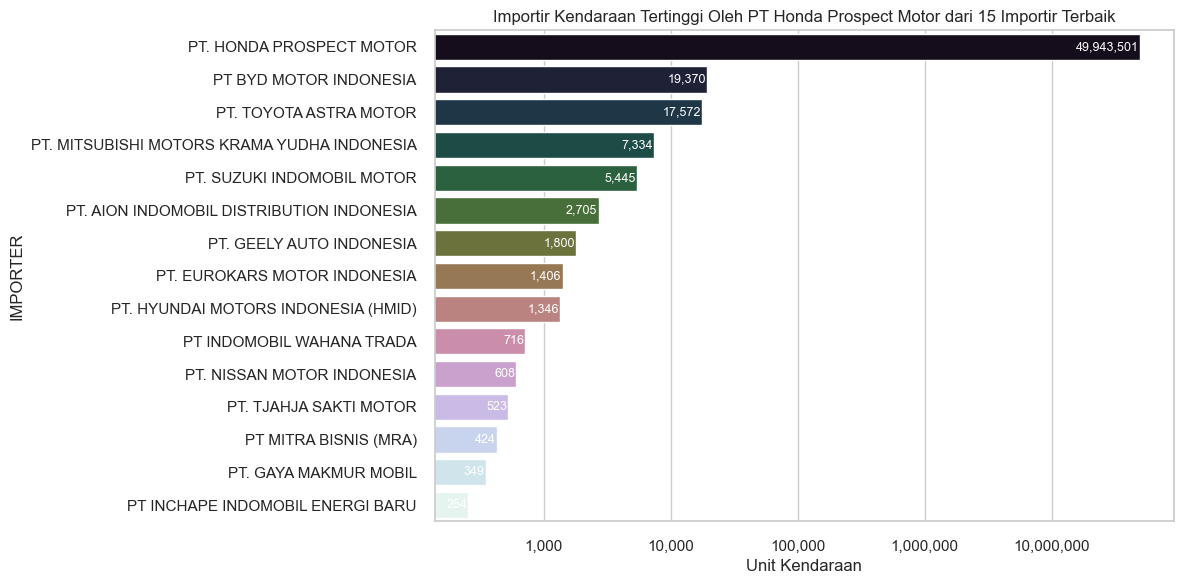

In [53]:
importer_total = gaikindo_df.groupby('IMPORTER')[month_cols].sum().sum(axis=1).sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=importer_total.values, y=importer_total.index, palette='cubehelix')
plt.xscale('log')

# Format angka agar tidak dalam notasi ilmiah
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tambahkan label angka putih di dalam bar
for i, val in enumerate(importer_total.values):
    plt.text(val * 0.98, i, f'{int(val):,}', color='white', va='center', ha='right', fontsize=9)

plt.title('Importir Kendaraan Tertinggi Oleh PT Honda Prospect Motor dari 15 Importir Terbaik')
plt.xlabel('Unit Kendaraan')
plt.tight_layout()
plt.show()
